# Sentiment Analyses Twitter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from twython import Twython
from textblob import TextBlob, Word
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

import warnings
warnings.filterwarnings("ignore")

/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
CONSUMER_KEY = "0pJRCT1emkOcrtxHl7lMN4N5A"
CONSUMER_SECRET = "IS4Gxcx1aQ1c5Hyei5PSePLS37IcVmYBT8Qt1t4IOxmLIxJD42"

twitter = Twython(CONSUMER_KEY,CONSUMER_SECRET)

In [3]:
results =twitter.search(q = "crytpo", count = 100)

In [4]:
results

{'statuses': [{'created_at': 'Wed Aug 31 10:43:29 +0000 2022',
   'id': 1564926847112151047,
   'id_str': '1564926847112151047',
   'text': 'RT @kyojinkayaxx: @GemListings #web3 ün kralı #irena\n@Irenagreencoin dir\n#web3 tabanlı alışveriş sitesi #irenastore',
   'truncated': False,
   'entities': {'hashtags': [{'text': 'web3', 'indices': [31, 36]},
     {'text': 'irena', 'indices': [46, 52]},
     {'text': 'web3', 'indices': [73, 78]},
     {'text': 'irenastore', 'indices': [104, 115]}],
    'symbols': [],
    'user_mentions': [{'screen_name': 'kyojinkayaxx',
      'name': 'Seyfettin Kaya',
      'id': 1460195779033935872,
      'id_str': '1460195779033935872',
      'indices': [3, 16]},
     {'screen_name': 'GemListings',
      'name': 'GemListings',
      'id': 2884956433,
      'id_str': '2884956433',
      'indices': [18, 30]},
     {'screen_name': 'Irenagreencoin',
      'name': 'Irena Green Energy Coin',
      'id': 1461250590181261313,
      'id_str': '1461250590181261313',
   

In [5]:
all_items = results["statuses"]

In [6]:
tweet_df = pd.DataFrame(all_items)
tweet_df.head()

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,contributors,retweeted_status,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive
0,Wed Aug 31 10:43:29 +0000 2022,1564926847112151047,1564926847112151047,RT @kyojinkayaxx: @GemListings #web3 ün kralı ...,False,"{'hashtags': [{'text': 'web3', 'indices': [31,...","{'result_type': 'recent', 'iso_language_code':...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,None,{'created_at': 'Tue Aug 30 13:05:19 +0000 2022...,False,3,0,False,False,tr,NaN,NaN
1,Wed Aug 31 10:43:26 +0000 2022,1564926833493262338,1564926833493262338,RT @mmkuyumcuoglu: 50.000 $ prize draw\nAdvert...,False,"{'hashtags': [{'text': 'irenacoin', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,None,{'created_at': 'Tue Aug 30 21:27:25 +0000 2022...,False,3,0,False,False,en,NaN,NaN
2,Wed Aug 31 10:42:49 +0000 2022,1564926675690872837,1564926675690872837,RT @BeyazKa23694237: @ProfesorTurkmen #irenaco...,False,"{'hashtags': [{'text': 'irenacoin', 'indices':...","{'result_type': 'recent', 'iso_language_code':...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,None,{'created_at': 'Tue Aug 30 19:47:07 +0000 2022...,False,2,0,False,False,tr,NaN,NaN
3,Wed Aug 31 10:42:46 +0000 2022,1564926663523291144,1564926663523291144,RT @mmkuyumcuoglu: 50.000 $ prize draw\nAdvert...,False,"{'hashtags': [{'text': 'irenacoin', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,None,{'created_at': 'Wed Aug 31 07:28:21 +0000 2022...,False,4,0,False,False,en,NaN,NaN
4,Wed Aug 31 10:42:36 +0000 2022,1564926621156524037,1564926621156524037,RT @heaven_owl: @XLarge9999 #irenacoin\n#binan...,False,"{'hashtags': [{'text': 'irenacoin', 'indices':...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,None,{'created_at': 'Tue Aug 30 20:58:10 +0000 2022...,False,3,0,False,False,und,NaN,NaN


In [7]:
tweet_df.shape

(92, 27)

In [8]:
tweet_user = pd.DataFrame([d["user"] for d in results["statuses"]])
tweet_user.head()

,id,id_str,name,screen_name,location,description,url,entities,protected,followers_count,...,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,withheld_in_countries,profile_banner_url
0,1530807048908296192,1530807048908296192,crypto wizard,crytpo_wizard,,,None,{'description': {'urls': []}},False,18,...,True,True,True,False,None,None,None,none,[],NaN
1,1530807048908296192,1530807048908296192,crypto wizard,crytpo_wizard,,,None,{'description': {'urls': []}},False,18,...,True,True,True,False,None,None,None,none,[],NaN
2,1530807048908296192,1530807048908296192,crypto wizard,crytpo_wizard,,,None,{'description': {'urls': []}},False,18,...,True,True,True,False,None,None,None,none,[],NaN
3,1530807048908296192,1530807048908296192,crypto wizard,crytpo_wizard,,,None,{'description': {'urls': []}},False,18,...,True,True,True,False,None,None,None,none,[],NaN
4,1530807048908296192,1530807048908296192,crypto wizard,crytpo_wizard,,,None,{'description': {'urls': []}},False,18,...,True,True,True,False,None,None,None,none,[],NaN


In [9]:
twitter_df = tweet_df.merge(tweet_user, left_index = True, right_index = True)

In [10]:
twitter_df

,created_at_x,id_x,id_str_x,text,truncated,entities_x,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,withheld_in_countries,profile_banner_url
0,Wed Aug 31 10:43:29 +0000 2022,1564926847112151047,1564926847112151047,RT @kyojinkayaxx: @GemListings #web3 ün kralı ...,False,"{'hashtags': [{'text': 'web3', 'indices': [31,...","{'result_type': 'recent', 'iso_language_code':...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,True,True,True,False,None,None,None,none,[],NaN
1,Wed Aug 31 10:43:26 +0000 2022,1564926833493262338,1564926833493262338,RT @mmkuyumcuoglu: 50.000 $ prize draw\nAdvert...,False,"{'hashtags': [{'text': 'irenacoin', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,True,True,True,False,None,None,None,none,[],NaN
2,Wed Aug 31 10:42:49 +0000 2022,1564926675690872837,1564926675690872837,RT @BeyazKa23694237: @ProfesorTurkmen #irenaco...,False,"{'hashtags': [{'text': 'irenacoin', 'indices':...","{'result_type': 'recent', 'iso_language_code':...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,True,True,True,False,None,None,None,none,[],NaN
3,Wed Aug 31 10:42:46 +0000 2022,1564926663523291144,1564926663523291144,RT @mmkuyumcuoglu: 50.000 $ prize draw\nAdvert...,False,"{'hashtags': [{'text': 'irenacoin', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,True,True,True,False,None,None,None,none,[],NaN
4,Wed Aug 31 10:42:36 +0000 2022,1564926621156524037,1564926621156524037,RT @heaven_owl: @XLarge9999 #irenacoin\n#binan...,False,"{'hashtags': [{'text': 'irenacoin', 'indices':...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,True,True,True,False,None,None,None,none,[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Wed Aug 31 04:42:28 +0000 2022,1564835994423046144,1564835994423046144,RT @BKEXGlobal: #BKEX Current Mining\n\n🌟Date:...,False,"{'hashtags': [{'text': 'BKEX', 'indices': [16,...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,True,True,True,False,None,None,None,none,[],NaN
88,Wed Aug 31 04:40:53 +0000 2022,1564835591937998848,1564835591937998848,RT @BKEXGlobal: #BKEX Current Mining\n\n🌟Date:...,False,"{'hashtags': [{'text': 'BKEX', 'indices': [16,...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,True,True,True,False,None,None,None,none,[],NaN
89,Wed Aug 31 04:39:02 +0000 2022,1564835129721139200,1564835129721139200,RT @BKEXGlobal: #BKEX Current Mining\n\n🌟Date:...,False,"{'hashtags': [{'text': 'BKEX', 'indices': [16,...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,True,True,True,False,None,None,None,none,[],NaN
90,Wed Aug 31 04:34:44 +0000 2022,1564834048195035136,1564834048195035136,RT @BKEXGlobal: #BKEX Current Mining\n\n🌟Date:...,False,"{'hashtags': [{'text': 'BKEX', 'indices': [16,...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,True,True,True,False,None,None,None,none,[],NaN


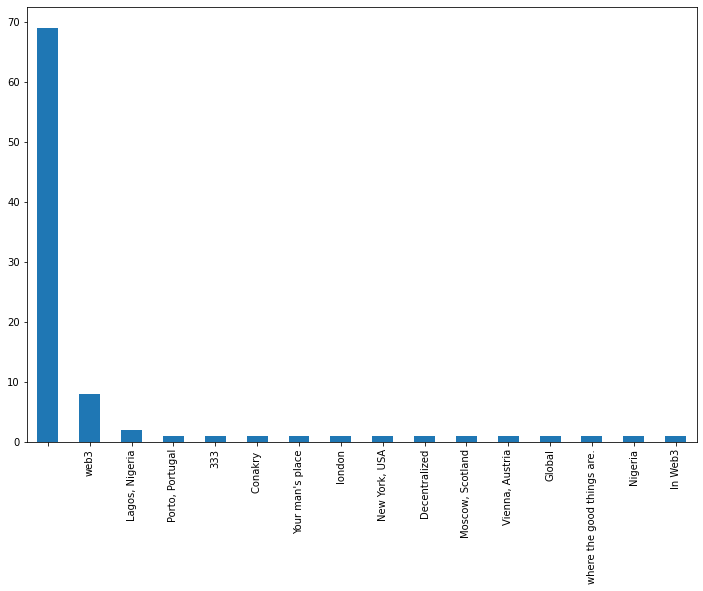

In [11]:
twitter_df.location.value_counts().plot(kind = "bar", figsize = (12,8));

In [12]:
test = twitter_df[["created_at_x","text"]]
test.head()

,created_at_x,text
0,Wed Aug 31 10:43:29 +0000 2022,RT @kyojinkayaxx: @GemListings #web3 ün kralı ...
1,Wed Aug 31 10:43:26 +0000 2022,RT @mmkuyumcuoglu: 50.000 $ prize draw\nAdvert...
2,Wed Aug 31 10:42:49 +0000 2022,RT @BeyazKa23694237: @ProfesorTurkmen #irenaco...
3,Wed Aug 31 10:42:46 +0000 2022,RT @mmkuyumcuoglu: 50.000 $ prize draw\nAdvert...
4,Wed Aug 31 10:42:36 +0000 2022,RT @heaven_owl: @XLarge9999 #irenacoin\n#binan...


In [13]:
test.drop("created_at_x",axis=1,inplace=True)
test.rename(columns={"text":"Text"}, inplace = True)
test.index.names = ["ItemID"]
test.head()

,Text
ItemID,
0,RT @kyojinkayaxx: @GemListings #web3 ün kralı ...
1,RT @mmkuyumcuoglu: 50.000 $ prize draw\nAdvert...
2,RT @BeyazKa23694237: @ProfesorTurkmen #irenaco...
3,RT @mmkuyumcuoglu: 50.000 $ prize draw\nAdvert...
4,RT @heaven_owl: @XLarge9999 #irenacoin\n#binan...


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    92 non-null     object
dtypes: object(1)
memory usage: 864.0+ bytes


In [15]:
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [16]:
test["sentiment"] = test.Text.apply(detect_sentiment)
test.sentiment.value_counts()

 0.000000    42
 0.250000    36
 0.437500     3
 0.500000     2
-0.200000     1
 0.150000     1
 0.350000     1
 0.425000     1
-0.100000     1
 0.170455     1
 0.600000     1
 0.375000     1
 0.700000     1
Name: sentiment, dtype: int64

In [17]:
test["Text"].duplicated().sum()

54

In [18]:
df = test
df.drop_duplicates(subset = "Text", inplace =True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 91
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Text       38 non-null     object 
 1   sentiment  38 non-null     float64
dtypes: float64(1), object(1)
memory usage: 912.0+ bytes


In [19]:
df.reset_index()

,ItemID,Text,sentiment
0,0,RT @kyojinkayaxx: @GemListings #web3 ün kralı ...,0.000000
1,1,RT @mmkuyumcuoglu: 50.000 $ prize draw\nAdvert...,0.500000
2,2,RT @BeyazKa23694237: @ProfesorTurkmen #irenaco...,0.000000
3,4,RT @heaven_owl: @XLarge9999 #irenacoin\n#binan...,0.000000
4,5,"RT @mmkuyumcuoglu: Environmentally friendly,\n...",0.437500
5,6,RT @zaguldogan: @AltcoinDailyio #irenacoin\n#i...,0.000000
6,8,RT @Mustafa14506730: @TheCryptoLark Dont miss ...,-0.200000
7,9,RT @zaguldogan: @AltcoinDailyio #irenacoin\n#G...,0.000000
8,11,RT @zaguldogan: @gate_io It's still a young sa...,0.150000
9,12,RT @BKEXGlobal: #BKEX Current Mining\n\n🌟Date:...,0.250000


In [20]:
df["Text"]=df["Text"].str.lower().str.replace("[^\w\s]","").str.replace("\d+","").str.replace("\n"," ").str.replace("\r","").str.replace("@"," ").str.replace("#"," ")

In [21]:
df.head()

,Text,sentiment
ItemID,,
0,rt kyojinkayaxx gemlistings web ün kralı irena...,0.0000
1,rt mmkuyumcuoglu prize draw advertising and ...,0.5000
2,rt beyazka profesorturkmen irenacoin irenagree...,0.0000
4,rt heaven_owl xlarge irenacoin binance mexc ...,0.0000
5,rt mmkuyumcuoglu environmentally friendly rene...,0.4375


In [22]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mehmetburakerkan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df["Text"] = df["Text"].apply(lambda x: word_tokenize(x))

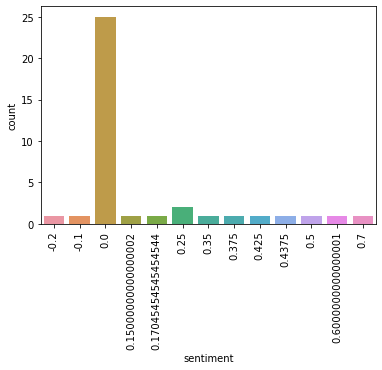

In [24]:
sns.countplot(x = df["sentiment"])
plt.xticks(rotation=90);

In [25]:
stop_words = list(stopwords.words("english"))

In [26]:
df["Text"] = df["Text"].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

,Text,sentiment
ItemID,,
0,"[rt, kyojinkayaxx, gemlistings, web, ün, kralı...",0.0000
1,"[rt, mmkuyumcuoglu, prize, draw, advertising, ...",0.5000
2,"[rt, beyazka, profesorturkmen, irenacoin, iren...",0.0000
4,"[rt, heaven_owl, xlarge, irenacoin, binance, m...",0.0000
5,"[rt, mmkuyumcuoglu, environmentally, friendly,...",0.4375


In [27]:
df["Text"] = df["Text"].apply(lambda x: " ".join(x))

In [28]:
df["Text"] = df["Text"].apply(lambda x: WordNetLemmatizer().lemmatize(x))

In [29]:
df["polarity"] = df["Text"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [30]:
df["subjectivity"] = df["Text"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [31]:
vect = CountVectorizer()
x = vect.fit_transform(df["Text"])

In [32]:
def tweet_sentence(score):
    if (score > 0.0) or(score == 0):
        return 1
    elif score<0.0:
        return 0
    
df["class"] = df["sentiment"].apply(lambda x: tweet_sentence(x))

In [33]:
y = df["class"]

In [34]:
def classification_(train,y):
    
    
    g = GaussianNB()
    b = BernoulliNB()
    k = KNeighborsClassifier()
    svc = SVC()
    d = DecisionTreeClassifier()
    log = LogisticRegression()
    gbc = GradientBoostingClassifier()
    mn = MultinomialNB()
    rf = RandomForestClassifier()
    ab = AdaBoostClassifier()

    x = train
    y = y
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = .2, random_state=42)
    algos = [g,b,k,svc,d,log,gbc,mn,rf,ab]
    algos_name = ['Gaussian','Bernoulli','KNeigbors','SVC','DecisionTree','LogisticRegr','GradientBoosting','Multinominal','RandomForest','AdaBoost']
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
   
    result = pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index = algos_name)
    
    for i in algos:
        
        predict = i.fit(x_train,y_train).predict(x_test)
        
        accuracy.append(accuracy_score(y_test,predict))
        precision.append(precision_score(y_test,predict))
        recall.append(recall_score(y_test,predict))
        f1.append(f1_score(y_test,predict))
        

    
    
    result.AccuracyScore = accuracy
    result.PrecisionScore = precision
    result.RecallScore = recall
    result.f1_Score = f1
    
    
    return result.sort_values('f1_Score',ascending=False)

In [35]:
x_df = pd.DataFrame(x.toarray(), columns=vect.get_feature_names())

In [37]:
classification_(x_df,y)

,AccuracyScore,PrecisionScore,RecallScore,f1_Score
Gaussian,0.875,0.875000,1.000000,0.933333
Bernoulli,0.875,0.875000,1.000000,0.933333
KNeigbors,0.875,0.875000,1.000000,0.933333
SVC,0.875,0.875000,1.000000,0.933333
DecisionTree,0.875,0.875000,1.000000,0.933333
LogisticRegr,0.875,0.875000,1.000000,0.933333
GradientBoosting,0.875,0.875000,1.000000,0.933333
RandomForest,0.875,0.875000,1.000000,0.933333
AdaBoost,0.750,0.857143,0.857143,0.857143
Multinominal,0.500,0.800000,0.571429,0.666667


In [38]:
df = df.reset_index()

In [39]:
del df["ItemID"]

In [42]:
vect = TfidfVectorizer(stop_words="english",ngram_range=(1, 1))
dtm = vect.fit_transform(df.Text)
features = vect.get_feature_names()
dtm.shape

(38, 282)

In [43]:
def summarize():
    review_length=0
    while review_length < 300:
        review_id = np.random.randint(0, len(df))
        review_text = str(df.Text[review_id])
        review_length = len(review_text)
        
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
            
            
    print("Top Scoring Words: ")
    top_scores = sorted(word_scores.items(),key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print(word)
        
    print("\n"+ review_text)

In [44]:
summarize() #kodu çalıştıramadım defalarca denedim ama olmadı tekrardan bakıcam

KeyboardInterrupt: 